In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [3]:
df=pd.read_csv('daily-total-female-births-CA.csv', header=0 , parse_dates=[0])

In [5]:
# df.head(),df.dtypes

(        date  births
 0 1959-01-01      35
 1 1959-01-02      32
 2 1959-01-03      30
 3 1959-01-04      31
 4 1959-01-05      44,
 date      datetime64[ns]
 births             int64
 dtype: object)

##### 1. Feature Engineering

#### 1.1 simple date feature

In [8]:

feature=df.copy(deep=True)
feature['year']=feature['date'].dt.year
feature['month']=feature['date'].dt.month
feature['day']=feature['date'].dt.day

#### 1.2 simple lead and lag feature

In [18]:

feature['lag1']=df['births'].shift(-1) ## it just like lead and lag function of sql: +1  is shifting uing lag by 1 row but in case of u use negate number it will the lead fucntion
feature

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,32.0,NaN
1,1959-01-02,32,1959,1,2,30.0,35.0
2,1959-01-03,30,1959,1,3,31.0,32.0
3,1959-01-04,31,1959,1,4,44.0,30.0
4,1959-01-05,44,1959,1,5,29.0,31.0
...,...,...,...,...,...,...,...
360,1959-12-27,37,1959,12,27,52.0,34.0
361,1959-12-28,52,1959,12,28,48.0,37.0
362,1959-12-29,48,1959,12,29,55.0,52.0
363,1959-12-30,55,1959,12,30,50.0,48.0


In [19]:
feature['lag2']=df['births'].shift(1) # lead 
feature

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,32.0,NaN
1,1959-01-02,32,1959,1,2,30.0,35.0
2,1959-01-03,30,1959,1,3,31.0,32.0
3,1959-01-04,31,1959,1,4,44.0,30.0
4,1959-01-05,44,1959,1,5,29.0,31.0
...,...,...,...,...,...,...,...
360,1959-12-27,37,1959,12,27,52.0,34.0
361,1959-12-28,52,1959,12,28,48.0,37.0
362,1959-12-29,48,1959,12,29,55.0,52.0
363,1959-12-30,55,1959,12,30,50.0,48.0


#### 1.3 Window Functionality

In [22]:
### rolling mean
feature['rolling_mean']=feature['births'].rolling(window=2).mean()
feature

,date,births,year,month,day,lag1,lag2,rolling_mean
0,1959-01-01,35,1959,1,1,32.0,NaN,NaN
1,1959-01-02,32,1959,1,2,30.0,35.0,33.5
2,1959-01-03,30,1959,1,3,31.0,32.0,31.0
3,1959-01-04,31,1959,1,4,44.0,30.0,30.5
4,1959-01-05,44,1959,1,5,29.0,31.0,37.5
...,...,...,...,...,...,...,...,...
360,1959-12-27,37,1959,12,27,52.0,34.0,35.5
361,1959-12-28,52,1959,12,28,48.0,37.0,44.5
362,1959-12-29,48,1959,12,29,55.0,52.0,50.0
363,1959-12-30,55,1959,12,30,50.0,48.0,51.5


In [23]:
### rolling max
feature['rolling_max']=feature['births'].rolling(window=2).max()
feature

,date,births,year,month,day,lag1,lag2,rolling_mean,rolling_max
0,1959-01-01,35,1959,1,1,32.0,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,30.0,35.0,33.5,35.0
2,1959-01-03,30,1959,1,3,31.0,32.0,31.0,32.0
3,1959-01-04,31,1959,1,4,44.0,30.0,30.5,31.0
4,1959-01-05,44,1959,1,5,29.0,31.0,37.5,44.0
...,...,...,...,...,...,...,...,...,...
360,1959-12-27,37,1959,12,27,52.0,34.0,35.5,37.0
361,1959-12-28,52,1959,12,28,48.0,37.0,44.5,52.0
362,1959-12-29,48,1959,12,29,55.0,52.0,50.0,52.0
363,1959-12-30,55,1959,12,30,50.0,48.0,51.5,55.0


##### 1.4 expanding

In [25]:
### this function doesn't want the window to be defined explicitly it just need calculate whatever aggregate function on a column based on when and where we are at the current row
feature['expanding_window']=feature['births'].expanding().max()
feature

,date,births,year,month,day,lag1,lag2,rolling_mean,rolling_max,expanding_window
0,1959-01-01,35,1959,1,1,32.0,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,30.0,35.0,33.5,35.0,35.0
2,1959-01-03,30,1959,1,3,31.0,32.0,31.0,32.0,35.0
3,1959-01-04,31,1959,1,4,44.0,30.0,30.5,31.0,35.0
4,1959-01-05,44,1959,1,5,29.0,31.0,37.5,44.0,44.0
...,...,...,...,...,...,...,...,...,...,...
360,1959-12-27,37,1959,12,27,52.0,34.0,35.5,37.0,73.0
361,1959-12-28,52,1959,12,28,48.0,37.0,44.5,52.0,73.0
362,1959-12-29,48,1959,12,29,55.0,52.0,50.0,52.0,73.0
363,1959-12-30,55,1959,12,30,50.0,48.0,51.5,55.0,73.0


#### 2. Upsampling and Downsampling

In [27]:
### will use new dataset
df_air=pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])
df_air.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


###### 2.1. Downsampling

In [33]:
### we will use resample function
quarterly_data=df_air.resample('Q',on='Month').mean().reset_index() ## Q is for Quaterly, A is for Annually
quarterly_data.head()

,Month,MilesMM
0,1963-03-31,6696.333333
1,1963-06-30,8756.000000
2,1963-09-30,10392.333333
3,1963-12-31,7356.333333
4,1964-03-31,7287.666667


In [34]:
yearly_sum_data=df_air.resample('A',on='Month').sum().reset_index() ## Q is for Quaterly, A is for Annually
yearly_sum_data.head()

,Month,MilesMM
0,1963-12-31,99603
1,1964-12-31,106192
2,1965-12-31,115431
3,1966-12-31,119154
4,1967-12-31,126515


##### 2.2 Upsampling

In [41]:
### in this we try to increase the frequency by using resample and interpolation techniques
updated_daily=df_air.resample('D',on='Month').mean()  ### it requires a aggregate fucntion
new_updated_daily=updated_daily.interpolate(method='linear') ### interpolation using linear function; it can be any other function too
new_updated_daily_2=updated_daily.interpolate(method='spline',order=2) ## this will be different from above with less sharp edges on interpolation curves
new_updated_daily_2,new_updated_daily

(                 MilesMM
 Month                   
 1963-01-01   6827.000000
 1963-01-02   6775.328886
 1963-01-03   6725.739829
 1963-01-04   6678.197709
 1963-01-05   6632.702526
 ...                  ...
 1970-11-27  12532.940278
 1970-11-28  12590.375575
 1970-11-29  12649.390645
 1970-11-30  12709.985487
 1970-12-01  12772.000000
 
 [2892 rows x 1 columns],
                  MilesMM
 Month                   
 1963-01-01   6827.000000
 1963-01-02   6806.064516
 1963-01-03   6785.129032
 1963-01-04   6764.193548
 1963-01-05   6743.258065
 ...                  ...
 1970-11-27  12615.066667
 1970-11-28  12654.300000
 1970-11-29  12693.533333
 1970-11-30  12732.766667
 1970-12-01  12772.000000
 
 [2892 rows x 1 columns])

### 3.Visualization

#### 3.1 Removing seasonality


<Axes: xlabel='Month'>

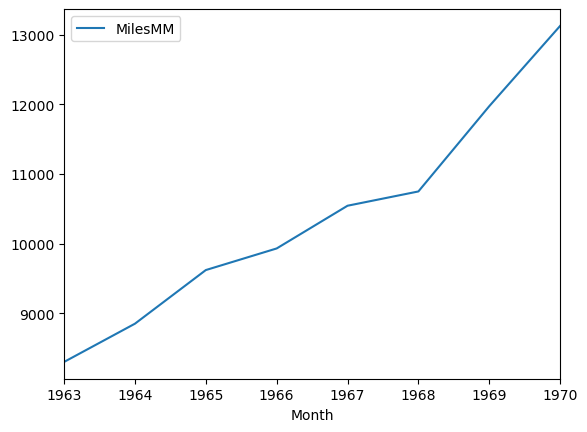

In [43]:
yearly_average_flown=df_air.resample('Y',on="Month").mean() ### first getting yearly level records
yearly_average_flown.plot() ## finally plotting what we have got

##### 3.2 Lag plot

In [44]:
import seaborn as sns

<Axes: xlabel='lag', ylabel='MilesMM'>

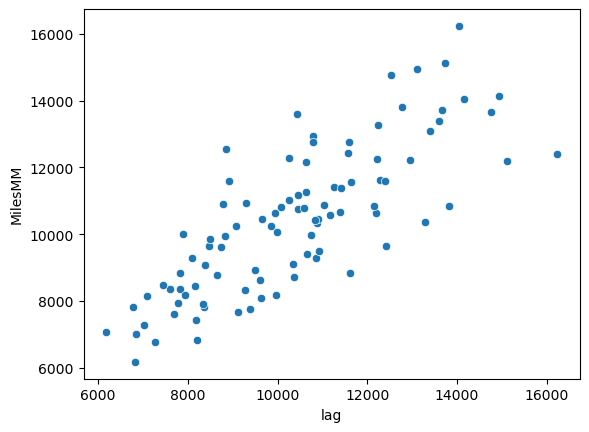

In [47]:
df_air['lag']=df_air['MilesMM'].shift(1)

sns.scatterplot(x=df_air['lag'],y=df_air['MilesMM']) ## method-1

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

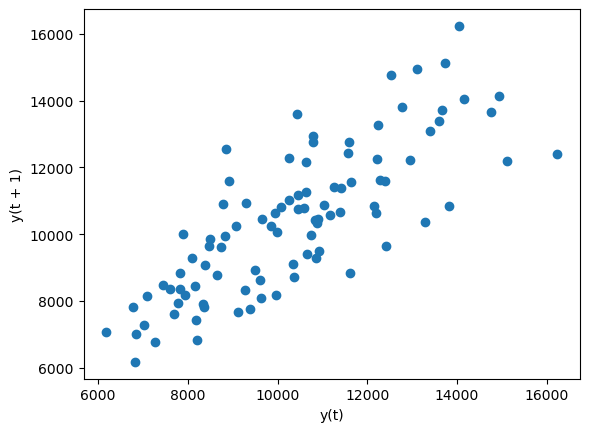

In [50]:
### method -2
from pandas.plotting import lag_plot
lag_plot(df_air['MilesMM'])

##### 3.3 Autocorrelation plot

In [52]:
from pandas.plotting import autocorrelation_plot ### it basically tels at different lag how does the variable changes

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

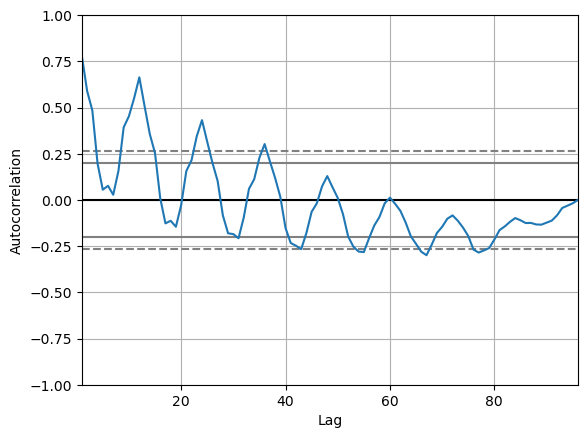

In [53]:
autocorrelation_plot(df_air['MilesMM'])

#### 4. Decomposing the time series in python

1. Additive model
y(t)=level +trends+ seasonality +noise
2. Multiplicative model
y(t)=level*trends*seasonality*noise

so level is just like average value and trends are like thetrend in the data seasonality is the a systematic peaks and noise is randomness in the data and in the time series decomposing it is adviced to decompose the whole data in these 4 blocks 

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose ### basically to get the seasonality and trend in a time series data

In [17]:
df_air=pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])
df_air.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [19]:
seas_decompose=df_air.copy(deep=True)
seas_decompose.index=df_air['Month'] ### stat model library requires the months to be in index

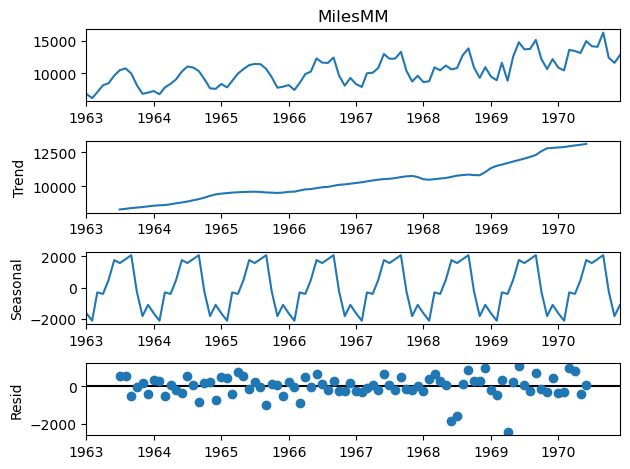

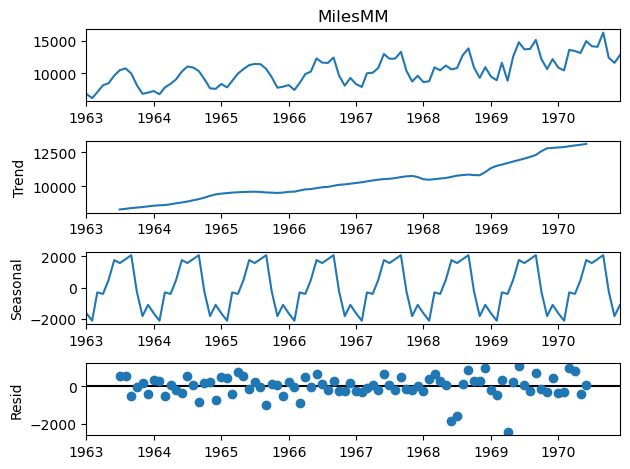

In [12]:
seas_decompose_add=seasonal_decompose(df_air['MilesMM'],model='additive')
seas_decompose_add.plot()

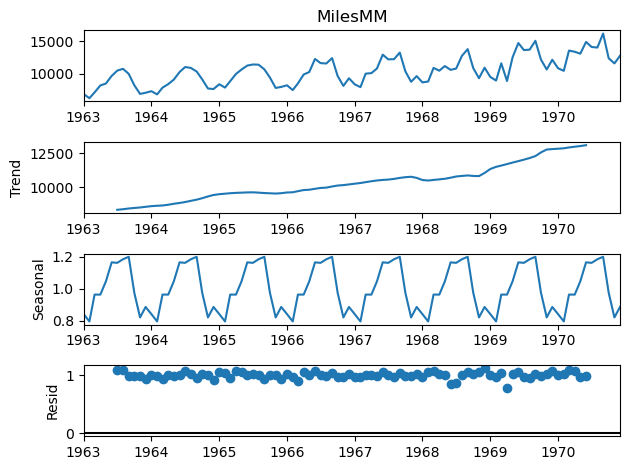

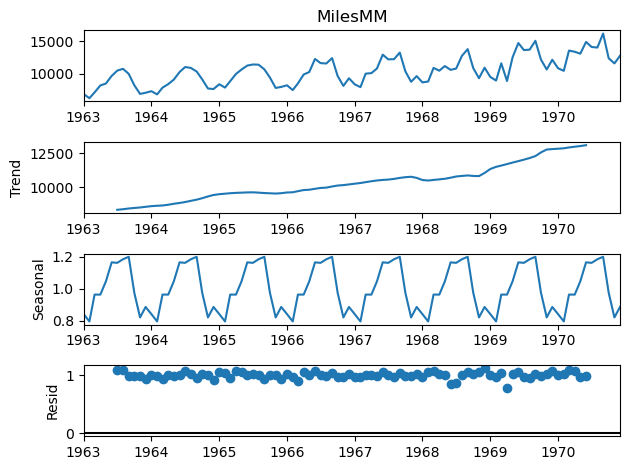

In [10]:
seas_decompose_mul=seasonal_decompose(df_air['MilesMM'],model='multiplicative')
seas_decompose_mul.plot() ### here seasonality value as you can see is lying between 0.8 to 1.2 as this is basically a multiplicative factor not an absolute value

##### 5. Differencing in Python

In [21]:
diff_air=df_air.copy(deep=True)

In [22]:
diff_air['lag1']=diff_air['MilesMM'].shift(1)
diff_air['diff_lag_og']=diff_air['MilesMM']-diff_air['lag1']
diff_air.head()

,Month,MilesMM,lag1,diff_lag_og
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


##### 5.1. REMOVING Trend by lag difference

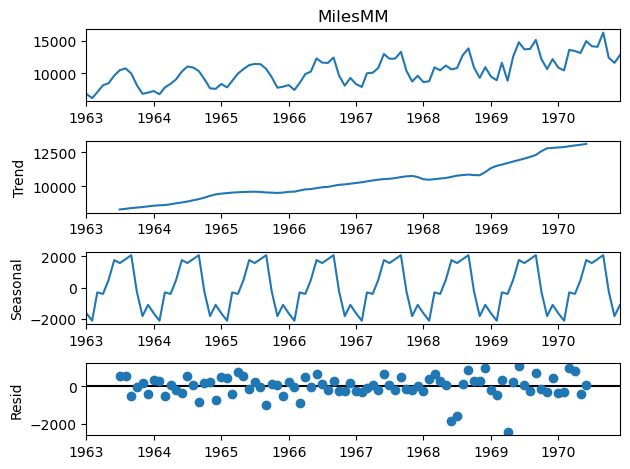

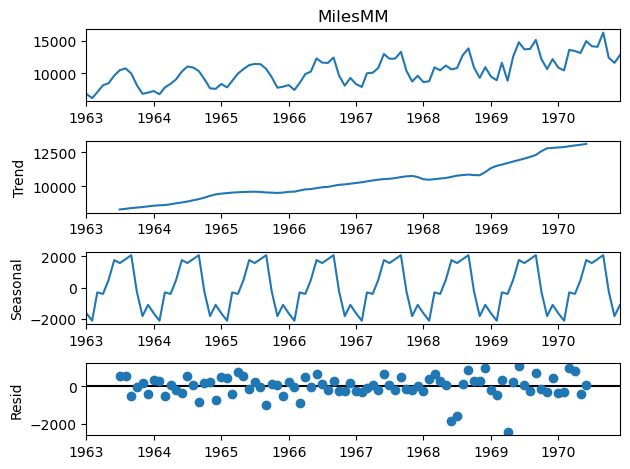

In [25]:
add_diff=diff_air.copy(deep=True)
add_diff.index=add_diff['Month']
result_add_diff=seasonal_decompose(add_diff['MilesMM'],model='additive')
result_add_diff.plot()

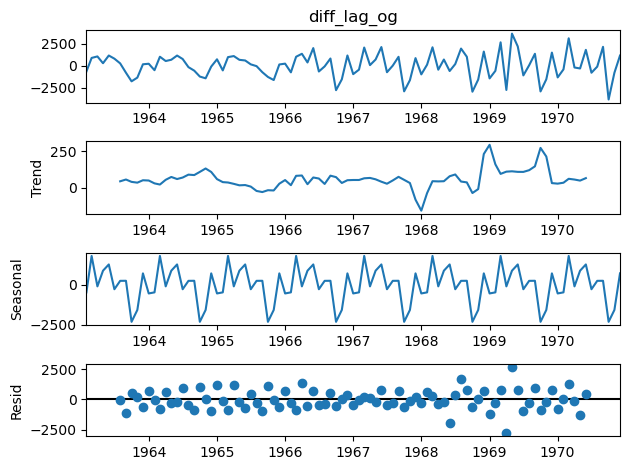

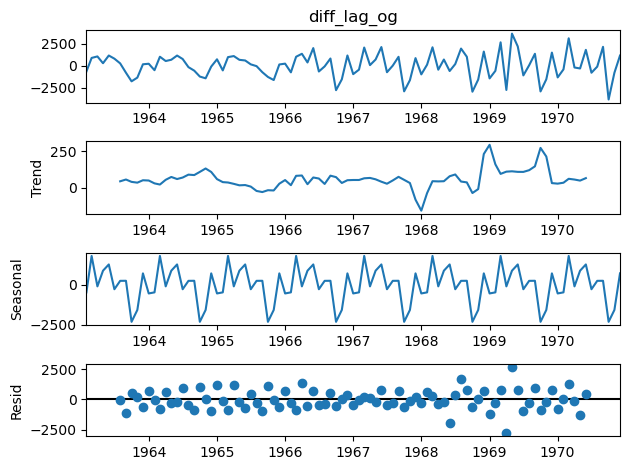

In [26]:
result_add_diff_lag=seasonal_decompose(add_diff.iloc[1:,3],model='additive') ## here iloc says take all rows of 3rd column without considering 1st row
result_add_diff_lag.plot()

###### 5.2 now removing seasonality
as it can be seen in above plot still we have seasonality but trends was removed. Here after lag of 12 should be applied to the series obtained after lag of 1 is done.

In [34]:
seasonal_removal=df_air.copy(deep=True)
seasonal_removal['diff_1months']=seasonal_removal['MilesMM'].diff(periods=1) ##this diff function is equivlent to shift (1) and then subtracting two columns
seasonal_removal['diff_12months']=seasonal_removal['diff_1months'].diff(periods=12) ##this diff function is equivlent to shift (1) and then subtracting two columns

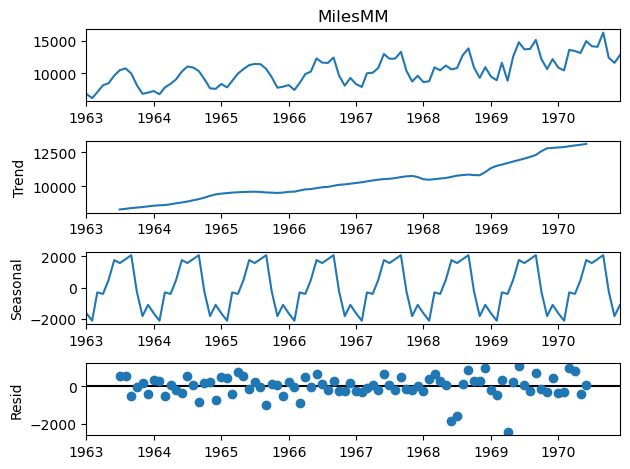

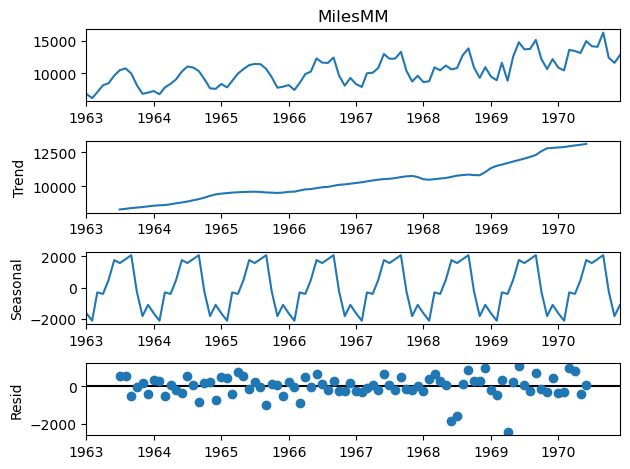

In [35]:
result_b_seas_rem=seasonal_removal.copy(deep=True)
result_b_seas_rem.index=result_b_seas_rem['Month']
seasonal_decompose(result_b_seas_rem['MilesMM'],model='additive').plot()

In [37]:
result_b_seas_rem

,Month,MilesMM,diff_1months,diff_12months
Month,,,,
1963-01-01,1963-01-01,6827,NaN,NaN
1963-02-01,1963-02-01,6178,-649.0,NaN
1963-03-01,1963-03-01,7084,906.0,NaN
1963-04-01,1963-04-01,8162,1078.0,NaN
1963-05-01,1963-05-01,8462,300.0,NaN
...,...,...,...,...
1970-08-01,1970-08-01,14057,-90.0,-154.0
1970-09-01,1970-09-01,16234,2177.0,798.0
1970-10-01,1970-10-01,12389,-3845.0,-920.0


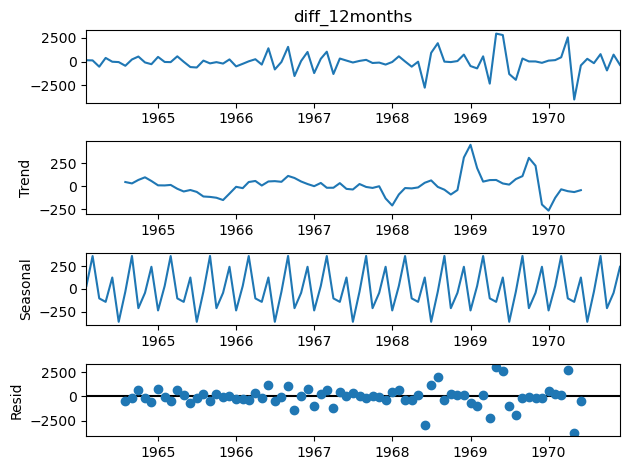

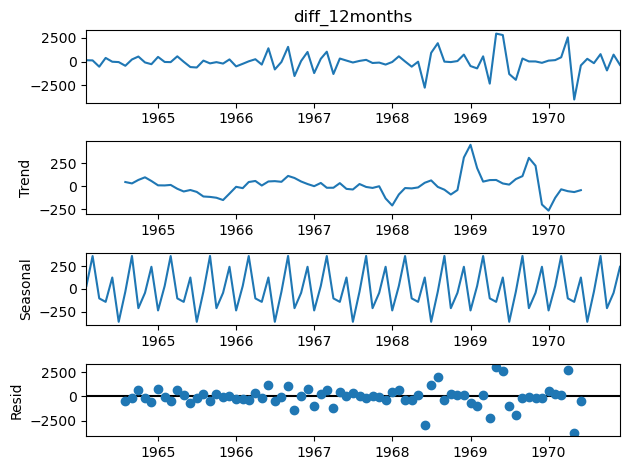

In [38]:
seasonal_decompose(result_b_seas_rem.iloc[13:,3],model='additive').plot() ## this should not have trend and seasonality 

##### 6. Train-Test split in time series

In [40]:
df_temp=pd.read_csv(r"daily-min-temperatures.csv",header=0,parse_dates=[0])

In [43]:
train_size=int(df_temp.shape[0]*0.8)
print(train_size)

2920


In [45]:
train_set=df_temp[0:train_size]
test_set=df_temp[train_size:]

##### 7. Naive model preparation

In [47]:
df_temp=pd.read_csv(r"daily-min-temperatures.csv",header=0,parse_dates=[0])
df_naivemodel=df_temp.copy(deep=True)

In [50]:
df_naivemodel['t']=df_naivemodel['Temp'].shift(1) ## here t is the new predictedvalue

In [51]:
### splitting in test and train
train=df_naivemodel[1: df_naivemodel.shape[0]-7] ## keeping all records in train except the last 7 values
test=df_naivemodel[df_naivemodel.shape[0]-7:] ## keeping the last 7 values in the test set

In [52]:
### getting train_X,Y and Test_X,y
train_X,train_y=train['t'],train['Temp']
test_X,test_y=test['t'],test['Temp']

In [56]:
### including walkforward validation
predictions=test_X.copy()

In [58]:
print(predictions)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [60]:
### checking mse as our evaluation metrics
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_y,predictions)
mse

3.4228571428571413

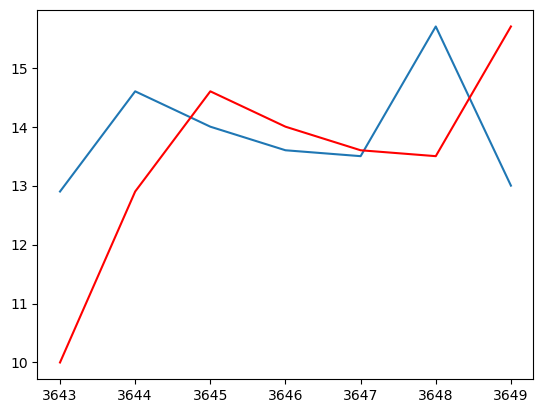

In [63]:
pyplot.plot(test_y)
pyplot.plot(predictions,color='red')

##### 8. Auto Regression Model

In [64]:
df_autoreg=df_temp.copy(deep=True)

In [73]:
train, test=df_autoreg.Temp[1:df_autoreg.shape[0]-7],df_autoreg[df_autoreg.shape[0]-7:]

In [77]:
from statsmodels.tsa.ar_model import AutoReg ### for autoregression
from statsmodels.tsa.ar_model import ar_select_order ### for getting the lags you want

In [103]:
lags=ar_select_order(train,maxlag=100) ### The ar_select_order function will help you determine the optimal lag order based on criteria like AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion)
# model=AutoReg(train,lags=lags.ar_lags) ### method-1
model=AutoReg(train,lags=29) ### method-2
model_result=model.fit()

AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are statistical metrics used for model selection, particularly in the context of statistical modeling and machine learning. They help in choosing the most appropriate model among a set of candidate models by balancing model fit and complexity. Lower values of AIC and BIC indicate better models.

Here's an explanation of both AIC and BIC:

Akaike Information Criterion (AIC):

AIC is a measure of the goodness of fit of a statistical model to a dataset.
It incorporates both the likelihood of the model (how well it fits the data) and the number of parameters in the model.
The idea is to strike a balance between model fit and model simplicity (preventing overfitting). AIC penalizes complex models more than simpler ones.
The formula for AIC is: AIC = -2 * log-likelihood + 2 * k, where k is the number of parameters in the model.
Lower AIC values indicate better models. When comparing models, the one with the lowest AIC is usually preferred.
Bayesian Information Criterion (BIC):

BIC is similar to AIC but places a stronger penalty on complex models.
Like AIC, it combines a measure of model fit and model complexity.
The formula for BIC is: BIC = -2 * log-likelihood + log(n) * k, where k is the number of parameters in the model, and n is the sample size.
BIC tends to favor simpler models more aggressively than AIC, especially when the sample size is relatively small.
Like AIC, lower BIC values indicate better models, and the model with the lowest BIC is preferred when comparing models.
In summary, AIC and BIC are used to assess and compare the quality of statistical models, taking into account both how well the models fit the data and how complex they are. AIC is more permissive of complex models than BIC, but the choice between them often depends on the specific problem and the trade-off between model fit and simplicity. Researchers and data analysts use these criteria to make informed decisions when selecting models for various statistical and machine learning tasks.







In [104]:
### getting the model params
model_result.params

const       0.557544
Temp.L1     0.588595
Temp.L2    -0.090826
Temp.L3     0.048262
Temp.L4     0.040065
Temp.L5     0.039302
Temp.L6     0.025946
Temp.L7     0.044668
Temp.L8     0.012768
Temp.L9     0.037436
Temp.L10   -0.000812
Temp.L11    0.004791
Temp.L12    0.018473
Temp.L13    0.026891
Temp.L14    0.000576
Temp.L15    0.024810
Temp.L16    0.007403
Temp.L17    0.009916
Temp.L18    0.034160
Temp.L19   -0.009120
Temp.L20    0.024213
Temp.L21    0.018787
Temp.L22    0.012184
Temp.L23   -0.018553
Temp.L24   -0.001772
Temp.L25    0.016732
Temp.L26    0.019762
Temp.L27    0.009832
Temp.L28    0.006227
Temp.L29   -0.001377
dtype: float64

In [105]:
predictions=model_result.predict(start=len(train),end=len(train)+len(test)-1)
predictions.fillna(0)

3643    13.053794
3644    13.532591
3645    13.243126
3646    13.091438
3647    13.146989
3648    13.176153
3649     0.000000
dtype: float64

In [106]:
mse=mean_squared_error(test_y, predictions.fillna(0))
mse

25.355560833364216

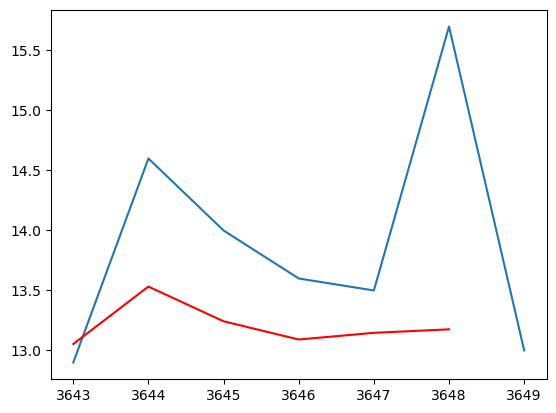

In [107]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

#### A. Implementing using walk forward method

In [111]:
df_autoreg_wal=df_temp.copy(deep=True)
train,test=df_autoreg_wal.Temp[1:df_autoreg_wal.shape[0]-7],df_autoreg_wal.Temp[df_autoreg_wal.shape[0]-7:]

In [119]:
## walkforward technique
data=train
predict=[]
for t in test:
    print(t)
    model=AutoReg(data,lags=29)
    result=model.fit()
    results=result.predict(start=len(data),end=len(train)+len(test)-1)
    print(results)
    predict.append(results)
    data=np.append(data,t)
    data=pd.Series(data)
    


12.9
3643    13.053794
3644    13.532591
3645    13.243126
3646    13.091438
3647    13.146989
3648    13.176153
3649          NaN
dtype: float64
14.6
3643    13.660700
3644    13.798659
3645    13.395598
3646    13.226714
3647    13.289842
3648    13.314958
dtype: float64
14.0
3644    14.353164
3645    13.638598
3646    13.365853
3647    13.413397
3648    13.445485
dtype: float64
13.6
3645    13.430121
3646    13.274476
3647    13.361221
3648    13.399179
dtype: float64
13.5
3646    13.374756
3647    13.405170
3648    13.424285
dtype: float64
15.7
3647    13.479111
3648    13.456697
dtype: float64
13.0
3648    14.767773
dtype: float64


#### Moving average model

In [120]:
df_moving_avg=df_temp.copy(deep=True)

In [121]:
df_moving_avg['t']=df_moving_avg['Temp'].shift(1)
df_moving_avg['Resid']=df_moving_avg['Temp']-df_moving_avg['Temp']

In [122]:
train, test=df_moving_avg['Resid'][1:df_moving_avg.shape[0]-7],df_moving_avg['Resid'][df_moving_avg.shape[0]-7:]

In [124]:
from statsmodels.tsa.ar_model import AutoReg
model=AutoReg(train, lags=29)
result=model.fit()
results=result.predict(start=len(train),end=len(train)+len(test)-1)
predictions=df_moving_avg['t'][df_moving_avg.shape[0]-7:]+results ### at this step what we are doing is we are adding the residual prediction to the predicted value which we have in column t and since we ahve used it directly as our predicted value which itself is derived by shifting of 1 so the first model we have used is Naive base and in predicting in residual we have used moving avergae


### now after this step just calcualte the mse and other error metrics for validation

#### 9. Arima Model
1. Here we work like: we want to identify the values of parameters p,d,q as discussed in word document
2. For finding D look for trend.
3. For finding P look for auto correlation chart or partitial correlation chart.
4. For finding Q look for partitial correlation chart

In [131]:
df_shampoo=pd.read_csv(r"shampoo.csv",header=0,parse_dates=[0])
df_shampoo.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


<Axes: >

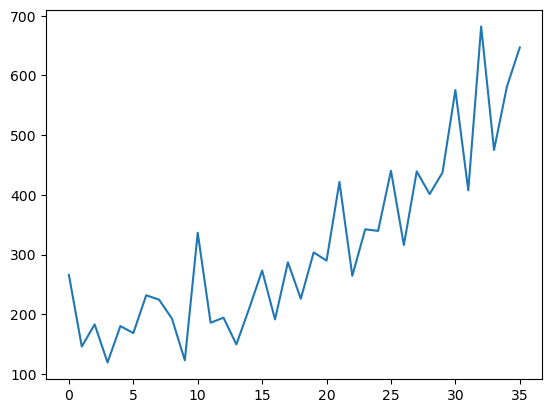

In [132]:
df_shampoo['Sales'].plot() ## it shows somesort of quadratic trend: increase very less in starting and then increase in some way in the later stages and so on

### so for ARIMA model we have D=2 for P (# of lags),D (# of differencing),Q (window size for moving average) parameters

###### D=2

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

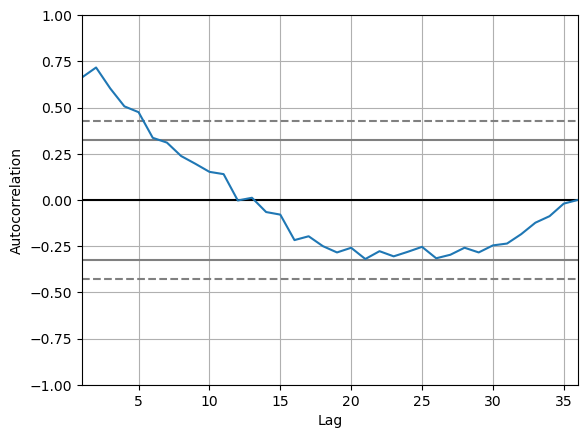

In [135]:
### for finding P
    
### plot autocorrelation chart 
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_shampoo['Sales'])

1. the trick here is to see what's the last point (value on x axis) before which the curve strike with solid confidence interval lines we can see from above image it is 5 so 
###### p=5

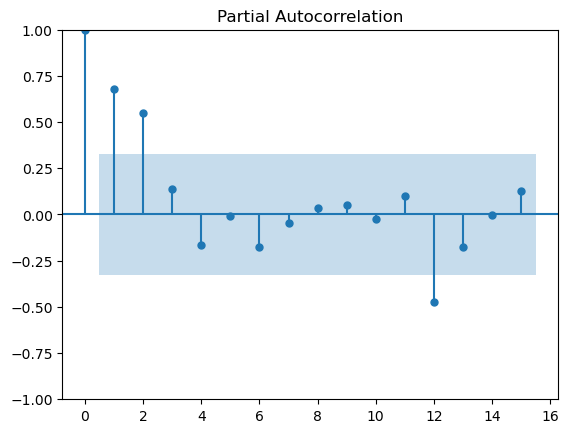

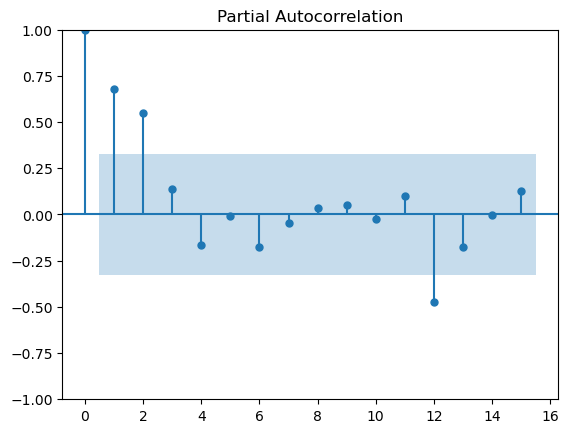

In [140]:
###plot partial autocorrelation plot for getting the value of Q
from statsmodels.graphics.tsaplots import plot_pacf ### for plotting partial correlation
plot_pacf(df_shampoo['Sales'],lags=15) ## here you can define a lags variable or let the module define its own

###### Here you can see in above graphs the last vertical line before the first vertical line goes into 95% CI is at 2 so Q=2

In [149]:
#### defining ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [154]:
model=ARIMA(df_shampoo['Sales'],order=(5,2,2))
model_fit=model.fit()
model_fit.summary() ## this will give you different statistics about the results the output with ar. .. as the suffix is the cofficient of that lag in autoregression model and with ma. .... as suffix are the cofficient fot moving average model, we should choose the those cofficient which has less p value 

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -191.901
Date:                Mon, 25 Sep 2023   AIC                            399.801
Time:                        23:18:50   BIC                            412.012
Sample:                             0   HQIC                           403.966
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2741      3.066     -0.416      0.678      -7.283       4.735
ar.L2         -0.9934      3.912     -0.254      0.800      -8.661       6.674
ar.L3         -0.8128      2.923     -0.278      0.781      -6.542       4.917
ar.L4         -0.5075      2.312     -0.220      0.826      -5.038       4.023
ar.L5         -0.0803      1.328     -0.060      0.952      -2.684       2.523
ma.L1         -0.8519      3.156     -0.270      0.787      -7.037       5.333
ma.L2          0.0832      2.548      0.033      0.974      -4.910       5.077
sigma2      3996.2471   1308.563      3.054      0.002    1431.512    6560.983
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.72   Prob(JB):                         0.81
Heteroskedasticity (H):               0.94   Skew:                            -0.00
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [157]:
##  to get residuals
residuals=model_fit.resid
residuals

0     266.000000
1    -251.238807
2     142.505040
3      28.068090
4      83.068409
5      66.236946
6     115.639122
7      87.241913
8      14.836677
9     -99.716257
10    102.089341
11      2.904553
12    -78.371595
13    -70.016026
14    -12.618148
15     46.254012
16     11.567681
17     72.642007
18     37.655436
19     33.284016
20     25.772479
21    137.109774
22    -32.168622
23    -43.864443
24    -19.740565
25     52.788903
26    -70.828930
27     29.552368
28     23.811459
29     -4.506717
30    125.730912
31    -18.377526
32    125.838441
33     -5.257830
34    -66.827182
35     35.952782
dtype: float64

<Axes: >

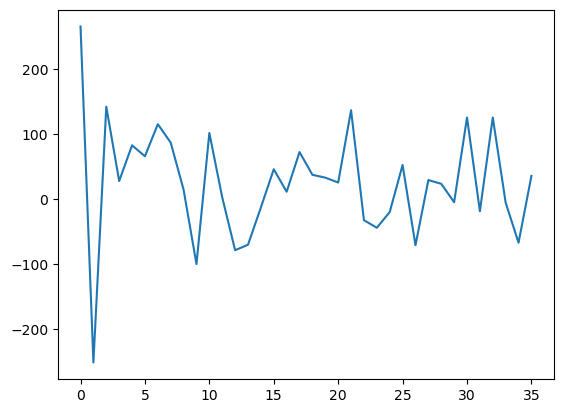

In [158]:
residuals.plot()

In [159]:
residuals.describe()

count     36.000000
mean      24.806048
std       88.931498
min     -251.238807
25%      -18.718286
50%       26.920284
75%       75.248608
max      266.000000
dtype: float64

#### variation in ARIMA
1. Arima: model =ARIMA(df['Sales'], orders=(2,2,5))
2. Autoregression: model =ARIMA(df['Sales'],orderss=(p,d,0)) ## make the value of q argument as 0
3. Moving Average: model =ARIMA(df['Sales'],orderss=(0,d,q)) ## make the value of p argument as 0


In [167]:
output=model_fit.forecast() ## to get the forecast value; if in order to generate next 5 forecast we can also do so just by providing an argument in forecast attribute
output

36    608.240313
dtype: float64

In [170]:
model_fit.forecast(5) ### here we have generated 5 forecast value

36    608.240313
37    700.069324
38    641.957562
39    725.401611
40    727.544084
Name: predicted_mean, dtype: float64

#### Walk forward validation in ARIMA model

In [171]:
df_shampoo=pd.read_csv(r"shampoo.csv",header=0,parse_dates=[0])
df_shampoo.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [172]:
train_size=int(df_shampoo.shape[0]*0.7)
train_size

25

In [173]:
train,test=df_shampoo.Sales[:train_size],df_shampoo.Sales[train_size:]

In [185]:
data=train
predict=[]
for i in test:
    model=ARIMA(data, order=(5,1,0))
    model_fit=model.fit()
    y=model_fit.forecast()
    print(y.values[0])
    predict.append(y.values[0])
    data=np.append(data,t)
    data=pd.Series(data)

368.6689556923214
336.7354684316301
67.34814221826774
-16.51960200779436
7.759296350584474
36.60115738284641
13.0
13.0
13.0
13.0
13.0


In [186]:
predict

[368.6689556923214,
 336.7354684316301,
 67.34814221826774,
 -16.51960200779436,
 7.759296350584474,
 36.60115738284641,
 13.0,
 13.0,
 13.0,
 13.0,
 13.0]

In [189]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test.values,predict)
mse

212299.0464179947

##### SARIMA Model 

In [190]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [196]:
df_airlines=pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])
df_airlines.index=df_airlines['Month']
df_airlines.head()

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462


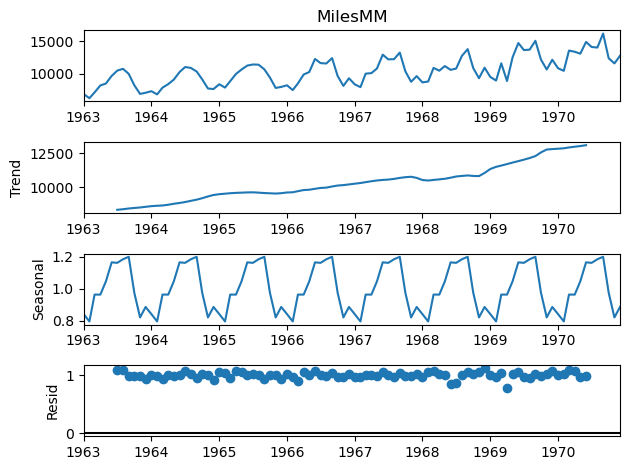

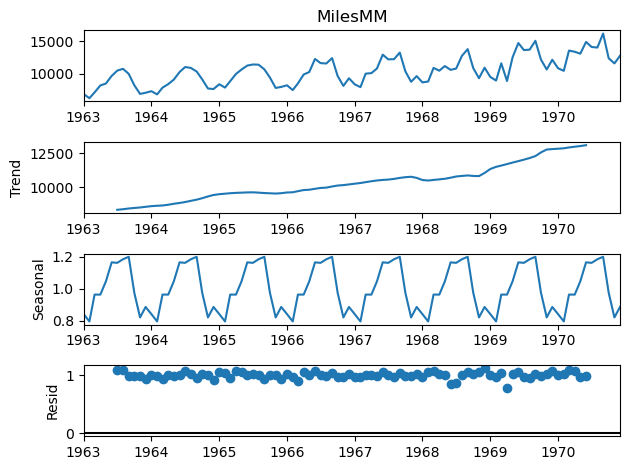

In [199]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_a=seasonal_decompose(df_airlines['MilesMM'], model='multiplicative')
result_a.plot()

In [200]:
model=SARIMAX(df_airlines['MilesMM'],order=(5,1,3),seasonal_order=(1,1,1,12)) ### here seasonal order is given as p,d,q,m

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [201]:
model_fit=model.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

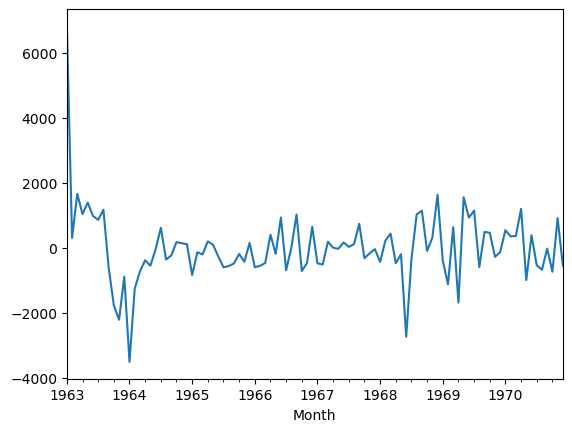

In [204]:
residuals=model_fit.resid
residuals.plot()

In [206]:
output=model_fit.forecast()
output

1971-01-01    11476.000788
Freq: MS, dtype: float64

In [207]:
model_fit.forecast(12)

1971-01-01    11476.000788
1971-02-01    11153.739113
1971-03-01    13670.158786
1971-04-01    12648.006632
1971-05-01    14338.913895
1971-06-01    15786.366118
1971-07-01    14979.451132
1971-08-01    15362.649708
1971-09-01    16963.089291
1971-10-01    13681.987053
1971-11-01    12426.872790
1971-12-01    13730.460296
Freq: MS, Name: predicted_mean, dtype: float64

In [210]:
yhat=model_fit.predict() ### this will just predict the values for every avaialble value in the dataset
yhat.head()

1963-01-01       0.000000
1963-02-01    5871.800077
1963-03-01    5421.975095
1963-04-01    7122.209703
1963-05-01    7067.882532
Freq: MS, Name: predicted_mean, dtype: float64

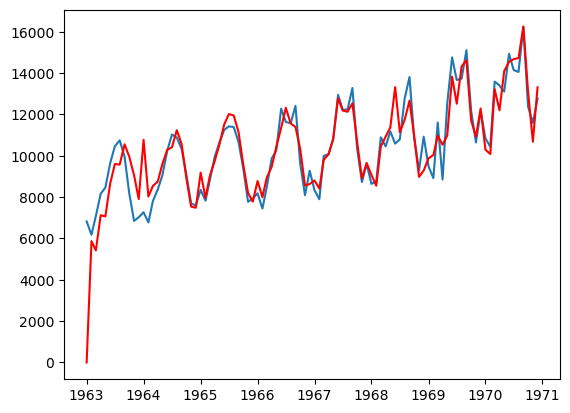

In [214]:
pyplot.plot(df_airlines['MilesMM'])
pyplot.plot(yhat, color='red')